# Quantum Clustering Demo
## Author: Carlos Hernani Morales
## Master's Final Project @ UV-ETSE: Data Science Master's Degree

In [ ]:
!ls gdrive/MyDrive/qc_demo

ls: cannot access 'gdrive/MyDrive/qc_demo': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#%cd gdrive/MyDrive/qc_demo
#!git clone https://github.com/carlos-hernani/QlusterPy.git


Mounted at /content/gdrive


In [ ]:
%pip install matplotlib==3.3
import os
os.kill(os.getpid(),9)

     |████████████████████████████████| 11.5 MB 211 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
%cd gdrive/MyDrive/qc_demo/QlusterPy/
from qluster import Qluster
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


/content/gdrive/MyDrive/qc_demo/QlusterPy
Num GPUs Available: 1 .

The tensorflow version is 2.6.0.

The scikit-learn version is 0.22.2.post1.

The matplotlib version is 3.3.0.



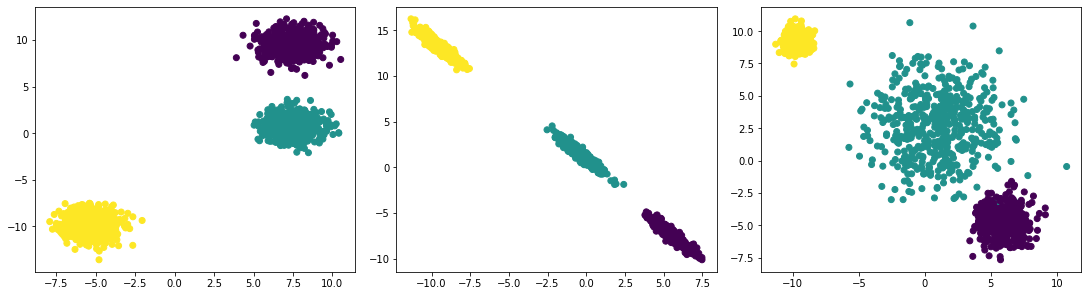

In [ ]:
n_samples = 1500
# Blobs
X, y = make_blobs(n_samples, random_state=8)
blobs = (X, y)
# Anisotropic
random_state = 175
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# Variable density
X, y = make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
varied = (X, y)
data = {
    'blobs': blobs,
    'aniso': aniso,
    'varied': varied
}

axd = plt.figure(constrained_layout=True, figsize=(15,4)).subplot_mosaic(
    """
    ABC
    """
)
axd['A'].scatter(data['blobs'][0][:,0],data['blobs'][0][:,1], c=data['blobs'][1])
axd['B'].scatter(data['aniso'][0][:,0],data['aniso'][0][:,1], c=data['aniso'][1])
axd['C'].scatter(data['varied'][0][:,0],data['varied'][0][:,1], c=data['varied'][1])

Before applying QC we need our length-scale parameter $\sigma$:

* Fixed value with gamma distribution, _kind = "gamma"_
* Density-based calculation, _kind = "knn"_





In [ ]:
data_scaled = {}
centers_scaled = {}
for dataset, Xy in data.items():
    sca = StandardScaler()
    sca.fit(Xy[0])
    X_scaled = sca.transform(Xy[0])
    data_scaled.update({dataset: X_scaled})


In [ ]:
gammavs = 'gamma.4'
knnvs = 'knn.4'

gamma_results = {}
knn_results = {}
for dataset, x in data_scaled.items():
    gamma_qc = Qluster(gammavs)
    knn_qc = Qluster(knnvs)
    gamma_qc.fit(x, tol=0.000001)
    knn_qc.fit(x)
    gamma_results.update({dataset: gamma_qc})
    knn_results.update({dataset: knn_qc})


(1500,)
step:  10
step:  20
step:  30
step:  40
step:  50
step:  60
step:  70
step:  80
step:  90
step:  100
step:  110
step:  120
step:  130
step:  140
step:  150
step:  160
step:  170
step:  180
step:  190
step:  200
step:  210
step:  220
step:  230
step:  240
step:  250
step:  260
step:  270
step:  280
step:  290
step:  300
step:  310
step:  320
step:  330
step:  340
step:  350
step:  360
step:  370
step:  380
step:  390
step:  400
step:  410
step:  420
step:  430
step:  440
step:  450
step:  460
step:  470
step:  480
step:  490
step:  500
step:  510
step:  520
step:  530
step:  540
step:  550
step:  560
step:  570
step:  580
step:  590
step:  600
step:  610
step:  620
step:  630
step:  640
step:  650
step:  660
step:  670
step:  680
step:  690
step:  700
step:  710
step:  720
step:  730
step:  740
step:  750
step:  760
step:  770
step:  780
step:  790
step:  800
step:  810
step:  820
step:  830
step:  840
step:  850
step:  860
step:  870
step:  880
step:  890
step:  900
step:  910


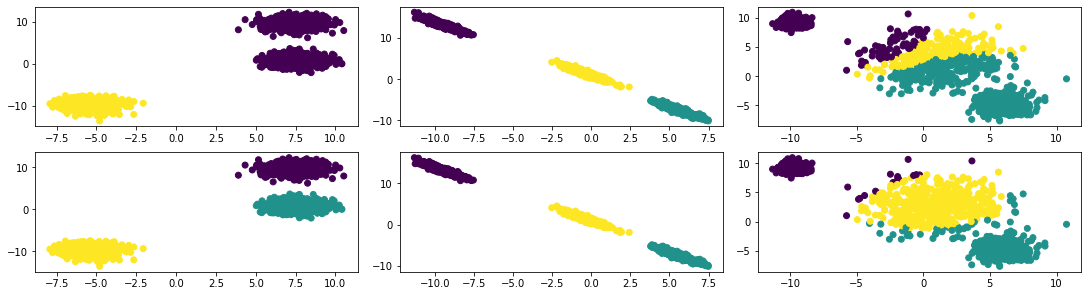

In [ ]:
axd = plt.figure(constrained_layout=True, figsize=(15,4)).subplot_mosaic(
    """
    ABC
    DEF
    """
)
axd['A'].scatter(data['blobs'][0][:,0],data['blobs'][0][:,1], c=gamma_results['blobs'].labels_)
axd['B'].scatter(data['aniso'][0][:,0],data['aniso'][0][:,1], c=gamma_results['aniso'].labels_)
axd['C'].scatter(data['varied'][0][:,0],data['varied'][0][:,1], c=gamma_results['varied'].labels_)
axd['D'].scatter(data['blobs'][0][:,0],data['blobs'][0][:,1], c=knn_results['blobs'].labels_)
axd['E'].scatter(data['aniso'][0][:,0],data['aniso'][0][:,1], c=knn_results['aniso'].labels_)
axd['F'].scatter(data['varied'][0][:,0],data['varied'][0][:,1], c=knn_results['varied'].labels_)

In [ ]:
%matplotlib inline
i, j = 0, 1
plt.close('all') # close all previous plots
name = 'blobs'
results = knn_results
# create a random line to plot
#------------------------------------------------------------------------------
from matplotlib import animation
from IPython.display import HTML
x, y = [], []

info = results[name].data
fig = plt.figure()
scat = plt.scatter(x, y, s=60)
plt.axis([-3, 2, -2, 2])
plt.xlabel(f'x{i}')
plt.ylabel(f'x{j}')

plt.close()
def animate(iter):
    x, y = info[iter]['coord'][:, i], info[iter]['coord'][:, j]
    scat.set_offsets(np.c_[x, y])
    return scat,
anim = animation.FuncAnimation(fig, animate, frames=len(info), 
                               interval=100, blit=False, repeat=False)

HTML(anim.to_html5_video())